<a href="https://colab.research.google.com/github/Larissa-Rocha/imersao-dados-alura/blob/main/aula_3_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 3

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)

In [ ]:
#vamos continuar analisando as notas totais, excluindo-se as notas zero

#lista com todas as notas:
provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']
#soma de todas as notas de cada inscrito
dados[provas].sum(axis=1)
#adicionando esta coluna no dataframe
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
provas.append('NU_NOTA_TOTAL')
dados_sem_nota_0 = dados.query('NU_NOTA_TOTAL != 0')

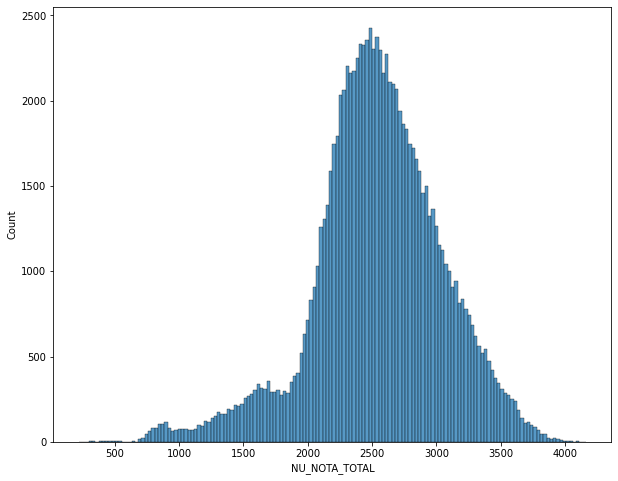

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_TOTAL')

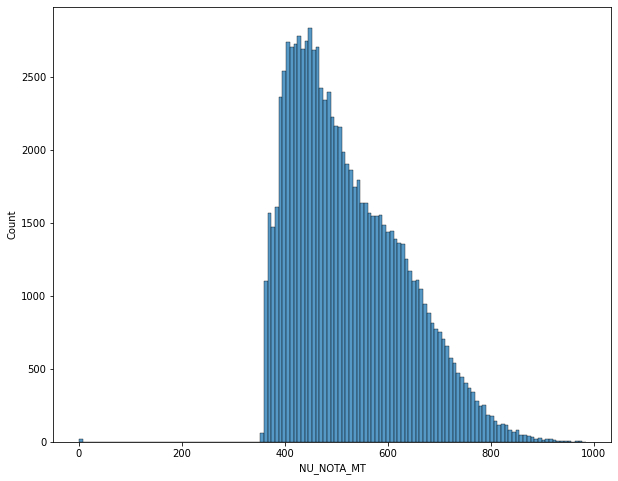

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_MT')

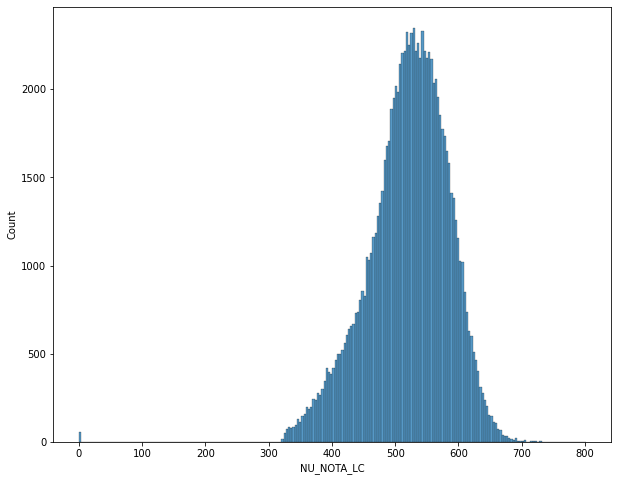

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_LC')

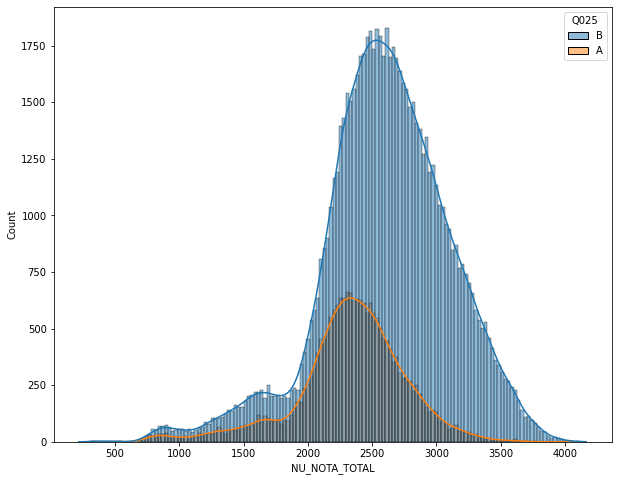

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde=True)

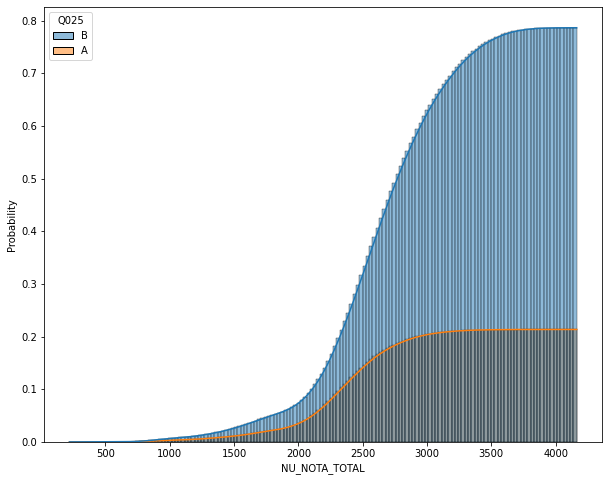

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde=True, stat='probability', cumulative=True)

(-50.0, 1050.0)

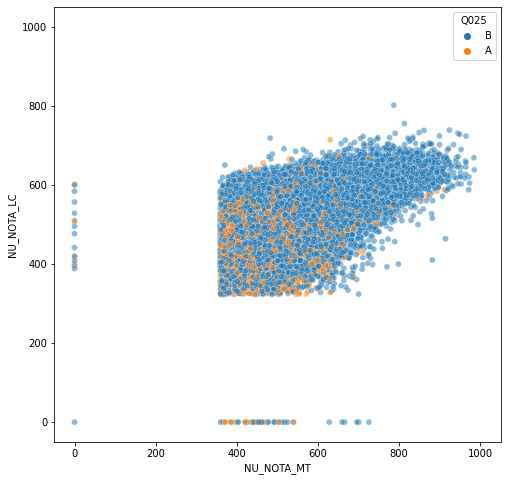

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = dados_sem_nota_0, x='NU_NOTA_MT', y='NU_NOTA_LC', hue='Q025', alpha=0.5)
#colocando os 2 eixos com os mesmos limites
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

#note que este gráfico não está bom para visualizar

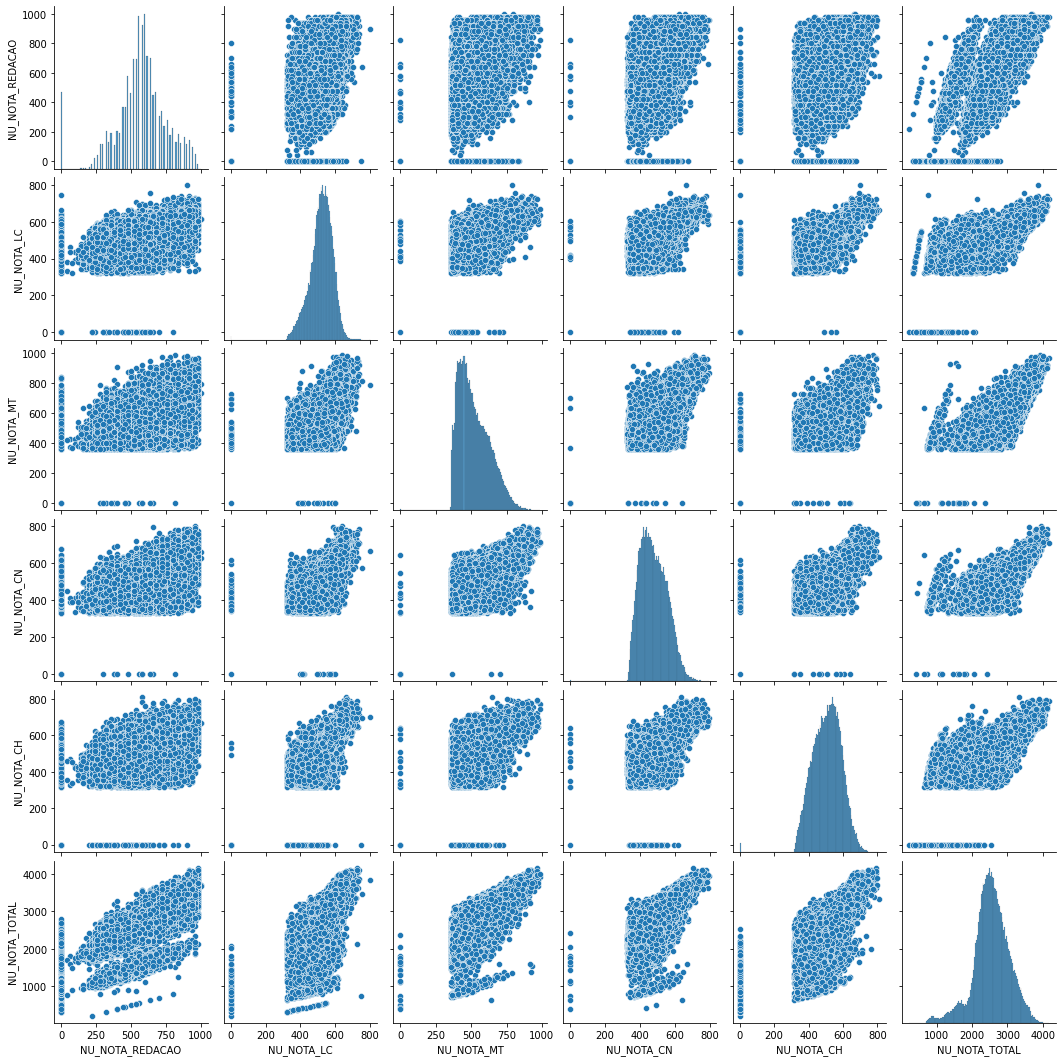

In [ ]:
sns.pairplot(dados_sem_nota_0[provas])

#este também é muito difícil de tirar conclusões, mas podemos enxergar algumas correlações
#como por exemplo, um candidato que tirou uma nota mais ou menos em uma prova, não tira uma nota ótima em outra
#qualitativamente falando

In [ ]:
#cálculo da correlação

correlacao = dados_sem_nota_0[provas].corr()
correlacao

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_TOTAL
NU_NOTA_REDACAO,1.000000,0.535797,0.493046,0.504740,0.528338,0.783647
NU_NOTA_LC,0.535797,1.000000,0.587710,0.641624,0.744170,0.711686
NU_NOTA_MT,0.493046,0.587710,1.000000,0.649527,0.610332,0.790051
NU_NOTA_CN,0.504740,0.641624,0.649527,1.000000,0.668979,0.785600
NU_NOTA_CH,0.528338,0.744170,0.610332,0.668979,1.000000,0.735534
NU_NOTA_TOTAL,0.783647,0.711686,0.790051,0.785600,0.735534,1.000000


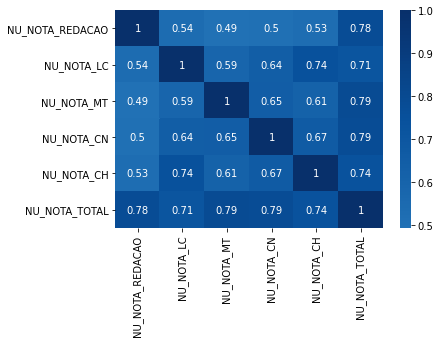

In [ ]:
#fazendo um mapa de calor

sns.heatmap(correlacao, cmap='Blues', center=0, annot=True)

### Desafios

Desafio 1: Plotar as médias, medianas e modas das provas de LC e MT (matplotlib linha vertical)

desafio 2: modificar a matriz de correlação (diagonal correlation seaborn)

desafio 3: filtrar as notas da cidade/estado e gera os histogramas de nota

desafio 4: pensar na correlação entre matemática e linguagem

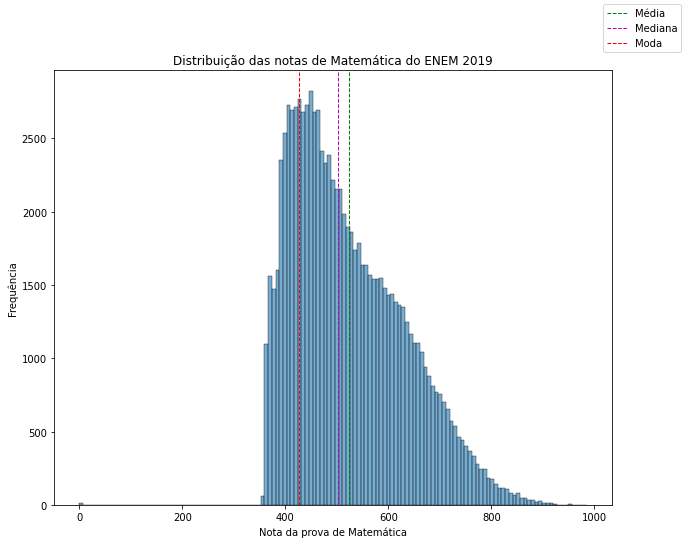

In [ ]:
#desafio 1

plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_MT', alpha = 0.6)
linha_media = plt.axvline(dados_sem_nota_0['NU_NOTA_MT'].mean(), color='g', linestyle='dashed', linewidth=1)
linha_mediana = plt.axvline(dados_sem_nota_0['NU_NOTA_MT'].median(), color='m', linestyle='dashed', linewidth=1)
linha_moda = plt.axvline(float(dados_sem_nota_0['NU_NOTA_MT'].mode()), color='r', linestyle='dashed', linewidth=1)

plt.xlabel("Nota da prova de Matemática")
plt.ylabel("Frequência")
plt.title('Distribuição das notas de Matemática do ENEM 2019')
plt.figlegend((linha_media, linha_mediana, linha_moda),('Média', 'Mediana', 'Moda'))

Text(0.5, 1.0, 'Correlação entre as notas das provas do ENEM 2019')

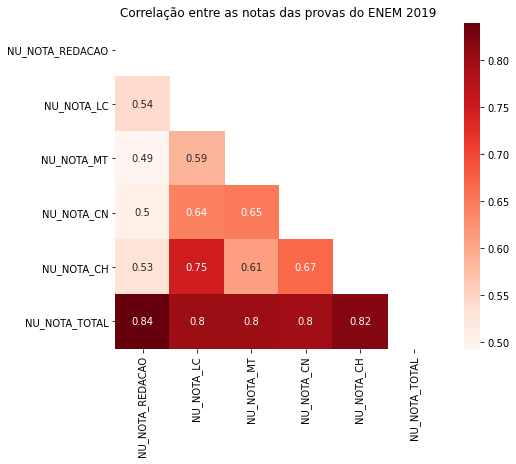

In [ ]:
#desafio 2

correlacao = dados_sem_nota_0[provas].corr()

mask = np.triu(np.ones_like(correlacao, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(correlacao, mask=mask, cmap="Reds", annot=True, square=True)
plt.title("Correlação entre as notas das provas do ENEM 2019")

Text(0.5, 1.0, 'Distribuição das notas de Redação do ENEM 2019 - Bahia')

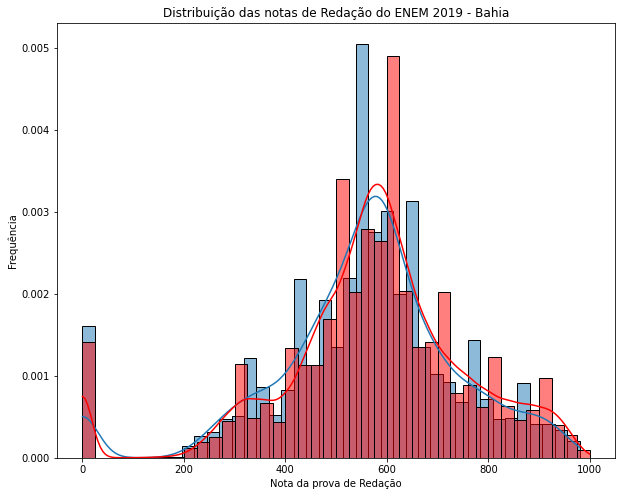

In [ ]:
#desafio 3

#notas de redação da bahia
notas_red_ba = dados_sem_nota_0.query("SG_UF_RESIDENCIA == 'BA'")
plt.figure(figsize=(10,8))
sns.histplot(notas_red_ba, x = 'NU_NOTA_REDACAO', kde=True, bins=40, stat='density', alpha = 0.5)
notas_brasil = sns.histplot(dados_sem_nota_0, x = 'NU_NOTA_REDACAO', kde=True, bins=40, color='red', stat='density', alpha = 0.5)
plt.xlabel("Nota da prova de Redação")
plt.ylabel("Frequência")
plt.title('Distribuição das notas de Redação do ENEM 2019 - Bahia')


Desafio 4:

Como é possível ver na matriz de correlação, as notas de matemática e de linguagem possuem uma correlação de 0.59, que curiosamente é maior do que a correlação entre linguagem e redação (0.54). É de se esperar que alunos que vão bem em uma prova, tendam a ter um desempenho parecido nas outras, já que provavelmente se prepararam para o enem como um todo. No entanto, devido a estrutura do enem (com bastante interpretação de texto em todas as notas), talvez estar bem preparado para a prova de linguagens, ajude a interpretar melhor os enunciados de matemática

## Aula 4

In [ ]:
#parâmetros para criar o modelo de machine learning

provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
prova_saida = 'NU_NOTA_MT'
dados_sem_nota_0 = dados_sem_nota_0[provas].dropna()
notas_entrada = dados_sem_nota_0[provas_entrada]
notas_saida = dados_sem_nota_0[prova_saida]

In [ ]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [ ]:
x = notas_entrada
y = notas_saida

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, 
                                                        random_state = SEED)

In [ ]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [ ]:
x_treino.shape

(69402, 4)

In [ ]:
len(y_treino)

69402

In [ ]:
len(x_teste)

23135

In [ ]:
y_teste.shape

(23135,)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

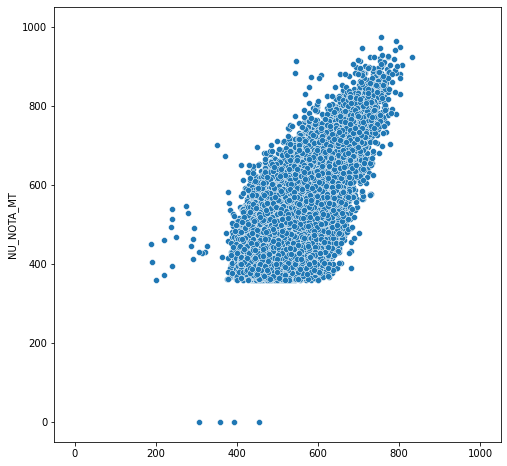

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = predicoes_matematica, y = y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

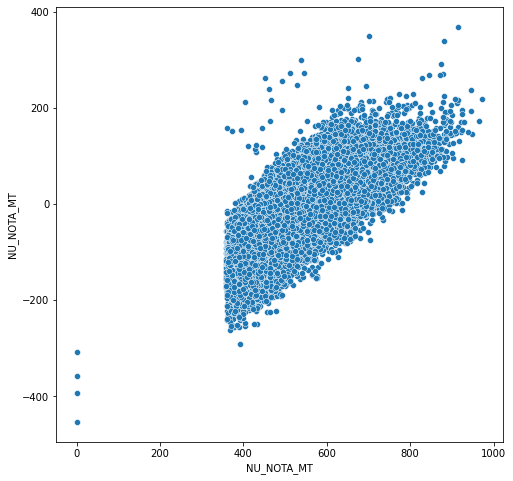

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_teste, y = y_teste - predicoes_matematica)
#plt.xlim((-50, 1050))
#plt.ylim((-50, 1050))

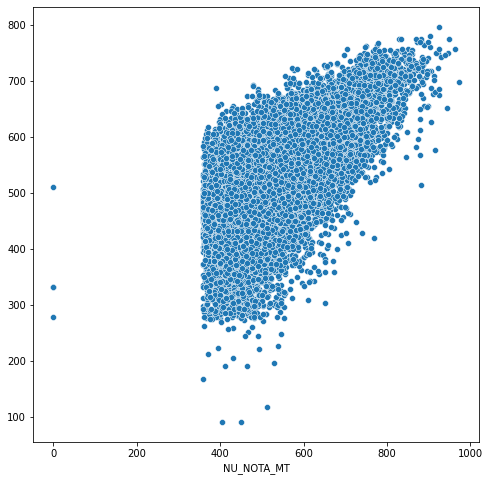

In [ ]:
#exemplo com a média das notas
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_teste, y = x_teste.mean(axis=1))

In [ ]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsao'] = predicoes_matematica
resultados['Diferenca'] = resultados['Real'] - resultados['Previsao']
resultados['Quadrado_diferenca'] = (resultados['Real'] - resultados['Previsao'])**2

In [ ]:
resultados

,Real,Previsao,Diferenca,Quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [ ]:
resultados['Quadrado_diferenca'].mean()

6604.415306219529

In [ ]:
(resultados['Quadrado_diferenca'].mean())**(1/2)

81.26755383435341

In [ ]:
#comparando nosso modelo com um mais simples

from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import  mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [ ]:
mean_squared_error(y_teste, predicoes_matematica)

6604.41530621957

Desafio 1: Procurar outro modelo de ML para treinar e comparar com o modelo criado em aula

desafio 2: Ler a documentação do Dummy e alterar o método de regressão

desafio 3: Buscar outras métricas de avaliação de modelos de regressão

## Aula 5

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


7598.622232066212

In [ ]:
#um novo modelo que não precisa colocar o valor de random_state

from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_mat_arvore = modelo_arvore.predict(x_teste)

In [ ]:
mean_squared_error(y_teste, predicoes_mat_arvore)

6027.166905272975

In [ ]:
#agora vamos ver que os valores mudam

from sklearn.tree import DecisionTreeRegressor

#o train_test_split adiciona mais um fator de aleatoriedade
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_mat_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_mat_arvore)

5996.41658667858

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, cv=10, scoring='neg_mean_squared_error')
#o parâmetro cv seta o número de divisões
#transformando os resultados do mean squared error de negativo para positivo:
media = (resultados["test_score"]*-1).mean()

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
resultados = cross_validate(modelo_arvore, x, y, cv=10, scoring='neg_mean_squared_error')
desvio_padrao = (resultados['test_score']*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f'Intervalo de confiança {lim_inferior} - {lim_superior}')

Intervalo de confiança 6027.906551740414 - 7088.548777577133


In [ ]:
def calcula_mse(resultados): 
  media = (resultados["test_score"]*-1).mean()
  desvio_padrao = (resultados['test_score']*-1).std()
  lim_inferior = media - (2*desvio_padrao)
  lim_superior = media + (2*desvio_padrao)

  print(f'Intervalo de confiança {lim_inferior} - {lim_superior}')

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import  KFold
import numpy as np

SEED = 1232
np.random.seed(SEED)

partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, cv=partes, scoring='neg_mean_squared_error')
calcula_mse(resultados)

Intervalo de confiança 6015.72254953682 - 7100.732779780727


In [ ]:
def regressor_arvore(nivel):
  SEED = 1232
  np.random.seed(SEED)
  partes = KFold(n_splits = 10, shuffle=True)
  modelo_arvore = DecisionTreeRegressor(max_depth = nivel)
  resultados = cross_validate(modelo_arvore, x, y, cv=partes, 
                              scoring='neg_mean_squared_error', return_train_score=True)
  print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)


Treino = 5760.834451245899|Teste = 5815.707286597402


In [ ]:
for i in range(1,21):
  regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.331403579403
Treino = 4598.125022484774|Teste = 6217.553668629227
Treino = 4316.3791662866815|Teste = 6521.403312280134
Treino = 4000.6209880837496|Teste = 6853.984106997142
Treino = 3655.8197526274853|Teste = 7224.863053512405
Treino = 3295.832684540846|Teste = 7636.168819779455
Treino = 2931.7212612043877|Teste = 8071.851486256819
Treino = 2575.59534021339|Teste = 8452.126711298857
Treino = 2233.574203221172|Teste = 8833.470

### Desafios

desafio 1: Pesquisar sobre intervalo de confiança

desafio 2: Testar com outros parâmetros da árvore de decisão

desafio 3: Procurar outras formas de realizar os ajustes de parâmetros com o sklearn

desafio 4: Pesquisar o que é o problema de underfit

desafio 5: Plotar um gráfico com o test_score e train_test

Desafio 1

Um intervalo de confiança para um parâmetro populacional é um intervalo com uma proporção associada p gerada por uma amostra aleatória de uma população subjacente, de tal forma que se o experimento for repetido várias vezes e o intervalo de confiança for recalculado para cada experimento com mesmo procedimento, uma proporção p dos intervalos de confiança conteria o parâmetro estatístico em questão. Os intervalos de confiança são usados para indicar a confiabilidade de uma estimativa. Por exemplo, o intervalo de confiança pode ser usado para descrever o quão confiáveis são os resultados de uma pesquisa (uma pesquisa com intervalo de confiança menor é mais confiável que uma pesquisa com intervalo de confiança maior). O intervalo de confiança com nível de confiança de 95% é o mais comum e significa que o resultado está dentro do intervalo de 95 dos 100 estudos hipoteticamente realizados.

Desafio 4

https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/ 